<a href="https://colab.research.google.com/github/VitaliyYasnitskiy/-/blob/main/SUR_%D0%A2%D0%B0bac_18_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Установка библиотеки для работы с ClickHouse

In [ ]:
import subprocess
import sys

def pip_install(package):
    return subprocess.check_output([sys.executable, "-m", "pip", "install", package])

pip_install("pandahouse")

b'Defaulting to user installation because normal site-packages is not writeable\nRequirement already satisfied: pandahouse in ./.local/lib/python3.6/site-packages (0.2.7)\nRequirement already satisfied: requests in ./.local/lib/python3.6/site-packages (from pandahouse) (2.26.0)\nRequirement already satisfied: toolz in ./.local/lib/python3.6/site-packages (from pandahouse) (0.11.1)\nRequirement already satisfied: pandas in ./.local/lib/python3.6/site-packages (from pandahouse) (1.1.5)\nRequirement already satisfied: pytz>=2017.2 in ./.local/lib/python3.6/site-packages (from pandas->pandahouse) (2021.3)\nRequirement already satisfied: numpy>=1.15.4 in ./.local/lib/python3.6/site-packages (from pandas->pandahouse) (1.19.5)\nRequirement already satisfied: python-dateutil>=2.7.3 in ./.local/lib/python3.6/site-packages (from pandas->pandahouse) (2.8.2)\nRequirement already satisfied: charset-normalizer~=2.0.0 in ./.local/lib/python3.6/site-packages (from requests->pandahouse) (2.0.7)\nRequir

### Параметры соединения с ClickHouse
Нужно вписать логин-пароль, адрес клика, базу данных, с которой планируется работать

In [ ]:
connection_test = dict(database='work_test',
                  host="http://clickhouse01.prod.analytics.crpt.tech:8123",
                  user='vyasnickiy',
                  password='VYzbh!2AePgPyux')

connection = dict(database='agg',
                  host="http://clickhouse01.prod.analytics.crpt.tech:8123",
                  user='vyasnickiy',
                  password='VYzbh!2AePgPyux')

connection_old = dict(database='agg',
                 
                  host="http://clickhouse01.prod.tobacco.crpt.tech:8123",
                  user='vyasnitskiy',
                  password='cJZ7OA7Z')

In [ ]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Чтение данных из слика в пандас

In [ ]:
pdf = ph.read_clickhouse('SELECT gtin, sgtin FROM work_test.tmp_sgtins_archive_arrays limit 10', connection=connection)
pdf

In [ ]:
#pdf = ph.read_clickhouse('SELECT gtin FROM agg.agg_cis limit 10', connection=connection_old)
pdf = ph.read_clickhouse('SELECT gt FROM agg.daily_moves limit 10', connection=connection_old)
#daily_sp_sales
pdf

### Заливка данных в клик
Таблица должна существовать в клике, схема используется из connection, в названии таблицы схему указывать не нужно

In [ ]:
ph.to_clickhouse(pdf, 'test_pd2click', index=False, chunksize=100000, connection=connection)

### Проверка заливки

In [ ]:
ph.read_clickhouse('SELECT * FROM work_test.test_pd2click limit 10', connection=connection)

In [ ]:
select_movies_query = """
SELECT gtin 
FROM agg.agg_cis

limit 100
"""
pdf = ph.read_clickhouse(select_movies_query,connection=connection)
pdf.head()
#where inn IN ("""+str(DB_str)+""") or inn IN ("""+str(DB_str)+""")

In [ ]:
select_movies_query = """
SELECT gt
FROM agg.daily_moves

limit 100
"""
pdf = ph.read_clickhouse(select_movies_query,connection=connection)
pdf.head()


In [ ]:
select_movies_query = "SHOW TABLES"
pdf = ph.read_clickhouse(select_movies_query,connection=connection)
pdf.head()



In [ ]:
#python -m pip install
pip install upgrade pip
#user numpy scipy matplotlib ipython jupyter pandas sympy nose
#pip install scipy
#import scipy.stats as st

In [ ]:
!pip list -o

In [ ]:
pip install scipy

In [ ]:
pip install -U pip

## Установка компонент

In [ ]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np

select_movies_query = """
SELECT (i_in) inn, (gt) GTIN,  prid
FROM agg.daily_moves 

limit 100
"""
pdf = ph.read_clickhouse(select_movies_query,connection=connection)
pdf.head()






## Глобальне процедуры:

In [ ]:
import pandahouse as ph

def glGistogram(Tab_BN, Tab_SNG1, Tab_SNG2, Tab_SNG3, Tab_SNG4, TAB, Title, Axes):
    # Выводит: гисторгамма распределений по 4 группам и статистики 
    import scipy.stats as st
    import matplotlib.pyplot as plt 
    import scipy.stats as st
    
    plt.figure(figsize=(10, 10))

    x = Tab_BN['perc']    #распределение без нарушений
    
    q25, q75 = np.percentile(x,[.25,.75])
    bin_width = 2*(q75 - q25)*len(x)**(-1/3)
   
    bins = round((x.max() - x.min())/bin_width)
    print("Freedman–Diaconis number of bins:", bins)
    bins = 69
    plt.hist(x, density=True, bins=bins, label="Распределние УОТ без нарушений" )  #Распредение вероятности (S под кривой = 1)

    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
 
    kde = st.gaussian_kde(Tab_SNG1['perc'])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="Профиль УОТ с нарушениями Гр.1")

    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
    kde = st.gaussian_kde(Tab_SNG2['perc'])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="Профиль УОТ с нарушениями Гр.2")

    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
    kde = st.gaussian_kde(Tab_SNG3['perc'])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="Профиль УОТ с нарушениями Гр.3", color = 'lightblue')

    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
    #kde = st.gaussian_kde(df_sn['avg_day'])
    kde = st.gaussian_kde(Tab_SNG4['perc'])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="Профиль УОТ с нарушениями Гр.4", color = 'black')

    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
    kde = st.gaussian_kde(Tab_BN['perc'])
    plt.plot(kde_xs, kde.pdf(kde_xs), label="Профиль УОТ без нарушений", color = 'red')

    plt.legend(loc="upper left")
    plt.ylabel('Probability')
    plt.xlabel(Axes)
    plt.title(Title);
    
    def glPearson(TABi):
        #Расчет коэф. Пирсона
        X = TAB['perc']
        Y = TAB['Y']
        n = len(X)
        miu_x = sum(X) / n
        miu_y = sum(Y) / n
        stdev_x = (sum([(i - miu_x)**2 for i in X]) / n)**0.5
        stdev_y = (sum([(i - miu_y)**2 for i in Y]) / n)**0.5
        covariance = sum([(X[i] - miu_x) * (Y[i] -miu_y) for i in range(n)])
        pearson_coefficient = covariance / (n * stdev_x * stdev_y)
        #print("Коэффициент Пирсона", round(pearson_coefficient, 3))

        return pearson_coefficient

    #Вывод описательных статистик
    DF_BN = TAB.loc[TAB['Y'] == 0]  #DF без нарушений
    numbers = DF_BN['perc']

    print("Описательные статистики для DF без нарушений:")
    print("Среднее значение:", round(np.mean(numbers),3))
    print("Медиана:", round(np.median(numbers),3))
    #print("дисперсия", statistics.pvariance(numbers, mu=None))
    print("Standard_Deviation", round(np.std(numbers),3))
    print("Коэффициент Пирсона", round(glPearson(TAB), 3))
    
    
def glDBF_to_str(DB):   
    DB_str = ""  
    for i in range(len(DB)):         # len(A) - возвращает количество строк в матрице А
         for j in range(len(DB[i])):  # len(A[i]) - возвращает количество элементов в строке i
       
            #DB_str = "\u0027"+str(DB[i][j])+"\u0027"+"," + DB_str
            DB_str = DB_str + "\u0027"+str(DB[i][j])+"\u0027"
            if i != len(DB)-1: DB_str = DB_str +","
    return(DB_str)

def glToExcel(path,DB):
    df = pd.DataFrame(DB)
    df.to_excel(path)

def gldfConcat(Tab_BN,Tab_SNG1,Tab_SNG2,Tab_SNG3,Tab_SNG4):
    #Вход: группы УОТ
    #Выход: TAB с конкатенцией
    Tab_SNG1['Y'] = 1
    Tab_SNG2['Y'] = 1
    Tab_SNG3['Y'] = 1
    Tab_SNG4['Y'] = 1
    Tab_BN['Y'] = 0
    #TAB = pd.concat([Tab_SNG1, Tab_SNG4, Tab_BN],ignore_index=True, keys=['df_sn_Y', 'df_bn_Y'])
    #TAB = pd.concat([Tab_SNG1, Tab_SNG4, Tab_BN],ignore_index=True) #, keys=['df_sn_Y', 'df_bn_Y'])
    #TAB = pd.concat([Tab_SNG1, Tab_SNG2, Tab_SNG3, Tab_SNG4, Tab_BN],ignore_index=True)
    TAB = pd.concat([Tab_SNG1, Tab_SNG2, Tab_SNG3, Tab_SNG4, Tab_BN],ignore_index=True)
    return TAB

def glLoaderSUN(path,sheet_name, Mi, Mj ,N=1):
   # Вход: Mi, Mj - интервал строк листа ексель-файла
   # Выход: DB_str - строка занчений выбранного интервала строк с ИНН выбранного листа эксель-файла
   
    DB = pd.read_excel(path, sheet_name = sheet_name)
    
    DB = DB.iloc[Mi:Mj, 0:N]
    DB = np.array(DB)
    DB_str = ""
    #j = 2

    for i in range(len(DB)):         # len(A) - возвращает количество строк в матрице А
         for j in range(len(DB[i])):  # len(A[i]) - возвращает количество элементов в строке i
       
            #DB_str = "\u0027"+str(DB[i][j])+"\u0027"+"," + DB_str
            DB_str = DB_str + "\u0027"+str(DB[i][j])+"\u0027"
            if i != len(DB)-1: DB_str = DB_str +","
                  
    return DB_str

# Нарушение №2. Cнижение объема ежемесячной закупки товаров в сравнении со средним объемом закупки
### - Приход в разрезе Месяц, ИНН, GTIN   - Расход в разрезе Месяц, ИНН, GTIN  * не включаия операции эмиссии/нанесения

In [ ]:
#Снижение объема ежемесячной закупки товаров в сравнении со средним объемом закупки
#Показатели для расчета

# - Приход в разрезе Месяц, ИНН, GTIN
# - Расход в разрезе Месяц, ИНН, GTIN
#* не включая операции эмиссии/нанесения        (добавить условие 11.10.21)
#и опт, и розница (скорее всего актуальней для розницы), возможно следует исключить торговые дома крупных производителей 

#Условия для расчета

#КМ в статусе >= "В обороте", эмитированные после 01.01.2021
#1). agg.daily_moves: dm.dt >= toDate('2021-01-01')       (Агрегирвоанная информация по движению кодов маркировки)
# i_in = ИНН,
    #2). agg.DAILY_SP_SALES                                   (Витрина по количеству продаж в разрезе точек)   
#3). agg.mv_monthly_gt_sales - не используем

# ИНН УОТ с нарушениями: Отклонения выявленные на событиях мая и июня 2021 года по табачной продукции 2-ух производителей.
# Убрать Петру (крупнейшие фабрики).   2.Убрать прочие товарные группы кроме табака

## Загрузка данных из УОТ СУН .xlsx

In [ ]:
def LoaderSUN(path,sheet_name, Mi, Mj ,N=1):
   # Вход: Mi, Mj - интервал строк листа ексель-файла
   # Выход: DB_str - строка занчений выбранного интервала строк с ИНН выбранного листа эксель-файла
   
    DB = pd.read_excel(path, sheet_name = sheet_name)
    
    DB = DB.iloc[Mi:Mj, 0:N]
    DB = np.array(DB)
    DB_str = ""

    for i in range(len(DB)):         # len(A) - возвращает количество строк в матрице А
         for j in range(len(DB[i])):  # len(A[i]) - возвращает количество элементов в строке i
      
            DB_str = DB_str + "\u0027"+str(DB[i][j])+"\u0027"
            if i != len(DB)-1: DB_str = DB_str +","

    return DB_str

path = '1.1 ИНН УОТ и количество отклонений.xls'
sheet_name = '1.Цена продажи > МРЦ'
Inn_SNG1_str_p1 = LoaderSUN(path,sheet_name,Mi=0, Mj=100,N=1)
Inn_SNG1_str_p2 = LoaderSUN(path,sheet_name,Mi=101, Mj=200,N=1)
Inn_SNG1_str_p3 = LoaderSUN(path,sheet_name,Mi=201, Mj=300,N=1)


path = '1.1 ИНН УОТ и количество отклонений.xls'
sheet_name = '2.Цена продажи < 0,75 x МРЦ'
#print(LoaderDB(path,sheet_name,Mi=0, Mj=3,N=1))
Inn_SNG2_str_p1 = LoaderSUN(path,sheet_name,Mi=0, Mj=100,N=1)
Inn_SNG2_str_p2 = LoaderSUN(path,sheet_name,Mi=101, Mj=200,N=1)
Inn_SNG2_str_p3 = LoaderSUN(path,sheet_name,Mi=201, Mj=300,N=1)

path = '1.1 ИНН УОТ и количество отклонений.xls'
sheet_name = '3.Цена продажи < ЕМЦ'
#print(LoaderDB(path,sheet_name,Mi=0, Mj=3,N=1))
Inn_SNG3_str_p1 = LoaderSUN(path,sheet_name,Mi=0, Mj=100,N=1)
Inn_SNG3_str_p2 = LoaderSUN(path,sheet_name,Mi=101, Mj=200,N=1)
Inn_SNG3_str_p3 = LoaderSUN(path,sheet_name,Mi=201, Mj=300,N=1)

path = '1.1 ИНН УОТ и количество отклонений.xls'
sheet_name = '4.Повторные продажи'
#print(LoaderDB(path,sheet_name,Mi=0, Mj=3,N=1))
Inn_SNG4_str_p1 = LoaderSUN(path,sheet_name,Mi=0, Mj=100,N=1)
Inn_SNG4_str_p2 = LoaderSUN(path,sheet_name,Mi=101, Mj=200,N=1)
Inn_SNG4_str_p3 = LoaderSUN(path,sheet_name,Mi=201, Mj=300,N=1)

#Далее код БД для получения ИНН без нарушений
#не используется  (реализовано 01.11.2021 в Loader_BN() ) 
def LoaderDB_BN(select_movies_query,connection_old, Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3, limit = 200):  # ВСТАВИТЬ ОСТАЛЬНЫЕ ЧАСТИ НАРУШЕНЙИ  (p1, p1, p3, всех пакетов)
#загрузка ИНН без нарущений

    select_movies_query = """
    SELECT inn
    FROM agg.daily_sp_sales dm
    where dt >= toDate('2021-01-01')
    and dt <= toDate('2021-03-30')
    and inn NOT IN ("""+str(Inn_SNG1_str_p1)+""") or inn NOT IN ("""+str(Inn_SNG1_str_p2)+""") or inn NOT IN ("""+str(Inn_SNG1_str_p3)+""")
    --and inn in ('7724490000','3621005430','6202004383')
    and pt = 0
    --and ds.et <> 3               -- Не остатки
    and gt not like '029%'        -- Не остатки
    group by inn
    having sum(cnt) > 0 
    limit 800               
    """                                         
    pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf_1


In [ ]:
# вход:  DB_BN из excel файла листа с группой нарушений (лист №1)  (
# выход: DB_BN_str  - строка ИНН без нарушений 

def Loader_BN(select_movies_query,connection_old, 
              Inn_SNG1_str_p1,Inn_SNG1_str_p2, Inn_SNG1_str_p3, 
              Inn_SNG2_str_p1,Inn_SNG2_str_p2, Inn_SNG2_str_p3,
              Inn_SNG4_str_p1,Inn_SNG4_str_p2, Inn_SNG4_str_p3,
              limit = 5000):  # ВСТАВИТЬ ОСТАЛЬНЫЕ ЧАСТИ НАРУШЕНЙИ  (p1, p1, p3, всех пакетов)
   #загрузка ИНН без нарушений daily_sp_sales
    select_movies_query = """
    SELECT inn
    FROM agg.daily_sp_sales dm
    left join dict.list_inns li on dm.inn = li.inn
    where dt < toDate('2021-08-01') 
    and dt >= toDate('2021-03-30')
    and reg_date < toDate('2020-07-01')
    and inn NOT IN ("""+str(Inn_SNG1_str_p1)+""") 
    and inn NOT IN ("""+str(Inn_SNG1_str_p2)+""") 
     and inn NOT IN ("""+str(Inn_SNG1_str_p3)+""") 
     and inn NOT IN ("""+str(Inn_SNG3_str_p1)+""") 
    and inn NOT IN ("""+str(Inn_SNG3_str_p2)+""") 
    and inn NOT IN ("""+str(Inn_SNG4_str_p1)+""") 
    and inn NOT IN ("""+str(Inn_SNG4_str_p2)+""") 
    and inn NOT IN ("""+str(Inn_SNG4_str_p3)+""") 
    and pt = 0
    --and ds.et <> 3               -- Не остатки
    and gt not like '029%'        -- Не остатки
    group by inn
    having sum(cnt) > 0 
    limit 5000           
    """                                         
    pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf_1

select_movies_query = ""
DB_BN = Loader_BN(select_movies_query, connection_old, 
                  Inn_SNG1_str_p1,Inn_SNG1_str_p2, Inn_SNG1_str_p3, 
                  Inn_SNG2_str_p1,Inn_SNG2_str_p2, Inn_SNG2_str_p3,
                  Inn_SNG4_str_p1,Inn_SNG4_str_p2, Inn_SNG4_str_p3
                  ,100)   # ВСТАВИТЬ ОСТАЛЬНЫЕ ЧАСТИ НАРУШЕНЙИ  (p1, p1, p3, всех пакетов)

    
def DBF_to_str(DB_BN):
    DB = DB_BN    
    DB_str_BN = ""  
    for i in range(len(DB)):         # len(A) - возвращает количество строк в матрице А
         for j in range(len(DB[i])):  # len(A[i]) - возвращает количество элементов в строке i
            DB_str_BN = DB_str_BN + "\u0027"+str(DB[i][j])+"\u0027"
            if i != len(DB)-1: DB_str_BN = DB_str_BN +","
    return(DB_str_BN)

DB_BN_p1 = np.array(DB_BN.iloc[0:100])
DB_BN_p2 = np.array(DB_BN.iloc[101:200])
DB_BN_p3 = np.array(DB_BN.iloc[201:300])
DB_BN_p4 = np.array(DB_BN.iloc[301:400])
DB_BN_p5 = np.array(DB_BN.iloc[401:500])
DB_BN_p6 = np.array(DB_BN.iloc[501:600])

Inn_BN_str_p1 = DBF_to_str(DB_BN_p1) # 'ЭТО ИНН без нарушений'
Inn_BN_str_p2 = DBF_to_str(DB_BN_p2) # 'ЭТО ИНН без нарушений'
Inn_BN_str_p3 = DBF_to_str(DB_BN_p3) # 'ЭТО ИНН без нарушений'
Inn_BN_str_p4 = DBF_to_str(DB_BN_p4)
Inn_BN_str_p5 = DBF_to_str(DB_BN_p5)
Inn_BN_str_p6 = DBF_to_str(DB_BN_p6)


##Розница

Freedman–Diaconis number of bins: 31
Описательные статистики для DF без нарушений:
Среднее значение: 38.232
Медиана: 29.4
Standard_Deviation 33.321
Коэффициент Пирсона -0.022


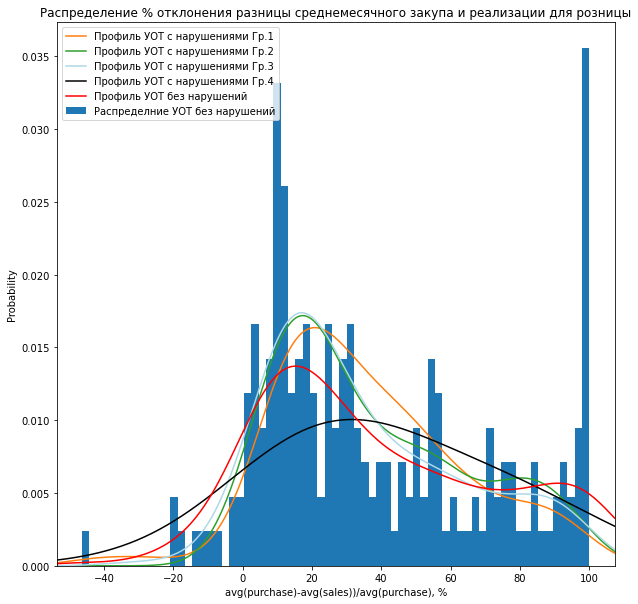

In [ ]:
#SELECT sum(sp.cnt_attempts +sp.cnt)
#    from agg.daily_sp_sales sp
 #   left join dict.list_gtins g on sp.gt=g.gtin
 #   where dt='2021-09-19' and pg=3 and pg_nk=3

def QueryRetail_2TEST(connection_old, DB_str_p1,  DB_str_p2, DB_str_p3):
# 22.09.21: выделено Кол-во розничных продаж по чеку cnt + cnt_attempts
# Наличие розничных продаж по чеку cnt + cnt_attempts>0
    select_movies_query = """
             SELECT inn
                   , sum(sales) sales_
                   , sum(purchase) purchase_
                --   , dt 
                --   , toMonth(dt) 
                   , floor(avg(sales),1) avg_sales
                   , floor(avg(purchase),1) avg_purchase
                   , floor( (avg(purchase)-avg(sales))/avg(purchase)*100 ,1) perc
                   --, floor( (avg(sales)-avg(purchase))/avg(purchase)*100 ,1) perc
                FROM
                        (SELECT dm.i_in inn 
                               , 0 sales
                               , sum(dm.c_s) purchase
                               , dt
                               , toMonth(dt) 
                        FROM agg.daily_moves dm
                        where dt >= toDate('2021-01-01')                                      
                            and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            --and inn IN ('504409346457','463212439404','320302005398', '7724490000')
                        group by inn , dt, toMonth(dt)
                        having sum(dm.c_s) > 0  
                    UNION ALL
                        SELECT  ds.inn inn 
                               --, sum(ds.cnt+ds.cnt_attempts) sales
                               , sum(ds.cnt) sales
                               , 0 purchase
                               , ds.dt dt
                               , toMonth(ds.dt)                           
                        FROM agg.daily_sp_sales ds
                             left join dict.list_gtins g on ds.gt=g.gtin
                              where ds.dt >= toDate('2021-01-01') and ds.pg=3 and g.pg_nk=3                                                                                                         
                              and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")      
                              --and ds.inn IN ('504409346457','463212439404','320302005398', '7724490000')                    
                              and ds.pt = 0
                              and ds.et <> 3                   -- Не остатки
                              and ds.gt not like '029%'        -- Не остатки                            
                        group by ds.inn 
                        , ds.dt
                        , toMonth(ds.dt)  
                        having sum(ds.cnt) > 0  
                        ) p              
                group by inn
                order by inn   
            """

    pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf_1


def QueryTEST(connection_old, DB_str_p1, DB_str_p2, DB_str_p3):
#В 2.0 отлажен в Jupiter 
#Без условия по рознице

    select_movies_query = """
              SELECT inn
                   , sum(sales) sales_
                   , sum(purchase) purchase_
                --   , dt 
                --   , toMonth(dt) 
                   , floor(avg(sales),1) avg_sales
                   , floor(avg(purchase),1) avg_purchase
                   , floor( (avg(purchase)-avg(sales))/avg(purchase)*100 ,1) perc
                FROM
                        (SELECT dm.i_in inn 
                               , 0 sales
                               , sum(dm.c_s) purchase
                               , dt
                               , toMonth(dt) 
                        FROM agg.daily_moves dm
                        left join dict.list_gtins g on dm.gt=g.gtin
                        where dt >= toDate('2021-01-01')                                      
                            and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                            --and ds.pg=3 
                            and g.pg_nk=3                    
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                        group by inn , dt, toMonth(dt)
                        having sum(dm.c_s) > 0  
                    UNION ALL
                        SELECT  ds.inn inn 
                              , sum(ds.cnt) sales
                                , 0 purchase
                               , ds.dt dt
                               , toMonth(ds.dt)                          
                        FROM agg.daily_sp_sales ds
                        left join dict.list_gtins g on ds.gt=g.gtin  
                         where ds.dt >= toDate('2021-01-01') 
                         and ds.pg=3 and g.pg_nk=3                    
                              and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")                          
                              and pt = 0
                              and ds.et <> 3                   -- Не остатки
                              and ds.gt not like '029%'        -- Не остатки
                              and pg = 3
                        group by ds.inn 
                        , ds.dt
                        , toMonth(ds.dt)  
                        having sum(ds.cnt) > 0  
                        ) p              
                group by inn
                order by inn           
            """

    pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf_1

def QueryRetail(connection_old, DB_str_p1, DB_str_p2, DB_str_p3):
#30/09/21 добавлено условие  and i_in!='-' and i_out ='-' and i_out!=prid : для розницы
#Отлажена розница

    select_movies_query = """
              SELECT inn
                  -- , prid,
                  -- pack_type
                   , sum(sales) sales_
                   , sum(purchase) purchase_
                --   , dt 
                --   , toMonth(dt) 
                   , floor(avg(sales),1) avg_sales
                   , floor(avg(purchase),1) avg_purchase
                   , floor( (avg(purchase)-avg(sales))/avg(purchase)*100 ,1) perc
                FROM
                        (SELECT dm.i_in inn 
                        , gt
                        , prid
                        , 0 sales
                        , sum(dm.c_s) purchase
                        , dt
                        , toMonth(dt) 
                        FROM agg.daily_moves dm
                        where dt >= toDate('2021-01-01')                                      
                        and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                       -- and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out ='-' and i_out!=prid
                        group by inn , dt, toMonth(dt)
                        , gt
                        , prid
                        --having sum(dm.c_s) > 0  
                    UNION ALL
                        SELECT  ds.inn inn 
                        , gt
                        , ds.prid
                              , sum(ds.cnt + ds.cnt_attempts) sales
                                , 0 purchase
                               , ds.dt dt
                               , toMonth(ds.dt)                          
                        FROM agg.daily_sp_sales ds
                       -- left join dict.list_gtins g on ds.gt=g.gtin  
                         where ds.dt >= toDate('2021-01-01') 
                         --    and ds.pg=3 and g.pg_nk=3                    
                             and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")     
                            -- and inn IN ('504409346457','463212439404','320302005398', '7724490000')                          
                              and pt = 0
                              and ds.et <> 3                   -- Не остатки
                              and ds.gt not like '029%'        -- Не остатки
                              and pg = 3
                              and pg != 12
                              and pg != 16
                        group by ds.inn 
                        , gt
                         , prid
                        , ds.dt
                        , toMonth(ds.dt)  
                        having sum(ds.cnt) > 0  
                        ) p              
                 left join dict.list_gtins g on p.gt=g.gtin and p.prid = g.inn
                 where g.pg_nk=3
                 and g.pack_type = 'pack'
                 group by inn                
                 order by inn   
            """

    pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf_1

def QueryWholesaleTEST(connection_old, DB_str_p1, DB_str_p2, DB_str_p3):
#Оптовые продажи

    select_movies_query = """
              SELECT inn
                  -- , prid,
                  -- pack_type
                   , sum(sales) sales_
                   , sum(purchase) purchase_
                    --   , dt 
                    --   , toMonth(dt) 
                   , floor(avg(sales),1) avg_sales
                   , floor(avg(purchase),1) avg_purchase
                   , floor( (avg(purchase)-avg(sales))/avg(purchase)*100 ,1) perc
                FROM
                        (SELECT dm.i_out inn 
                        , gt
                        , prid
                        , 0 sales
                        , sum(dm.c_s) purchase
                        , dt
                        , toMonth(dt) 
                        FROM agg.daily_moves dm
                        where dt >= toDate('2021-01-01')                                      
                            and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                         -- and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid
                        group by inn , dt, toMonth(dt)
                        , gt
                        , prid
                        --having sum(dm.c_s) > 0  
                    UNION ALL
                        SELECT  ds.inn inn 
                            , gt
                            , ds.prid
                            , sum(ds.cnt + ds.cnt_attempts) sales
                            , 0 purchase
                            , ds.dt dt
                            , toMonth(ds.dt)                          
                        FROM agg.daily_sp_sales ds
                         -- left join dict.list_gtins g on ds.gt=g.gtin  
                         where ds.dt >= toDate('2021-01-01') 
                         -- and ds.pg=3 and g.pg_nk=3                    
                             and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")     
                            -- and inn IN ('504409346457','463212439404','320302005398', '7724490000')                          
                              and pt = 0
                              and ds.et <> 3                   -- Не остатки
                              and ds.gt not like '029%'        -- Не остатки
                              and pg = 3
                        group by ds.inn 
                        , gt
                         , prid
                        , ds.dt
                        , toMonth(ds.dt)  
                        having sum(ds.cnt) > 0  
                        ) p              
                 left join dict.list_gtins g on p.gt=g.gtin and p.prid = g.inn --and g.pack_type = 'pack'
                 where g.pg_nk=3
                 and g.pack_type = 'pack'
                 group by inn                
                 order by inn   
            """

    pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf_1


def QueryWholesale(connection_old, DB_str_p1, DB_str_p2, DB_str_p3, flag):
#Оптовые продажи
   
             select_movies_query = """
             SELECT inn
                   , sum(sales) sales_
                   , sum(purchase) purchase_
                   , floor(avg(sales),1) avg_sales
                   , floor(avg(purchase),1) avg_purchase
                   , floor( (avg(purchase)-avg(sales))/avg(purchase)*100 ,1) perc
                  -- , dt
                  -- , toMonth(dt)
                 --  , Mn
                  FROM
                        (SELECT dm.i_out inn 
                      --  , gt
                       -- , prid
                        , 0 purchase
                        , sum(dm.c_s) sales
                       -- , dt
                        , toMonth(dt) Mn
                        FROM agg.daily_moves dm
                        where dt >= toDate('2021-01-01')                                      
                      --  and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                        and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН исходящий заполнен => оптовая реализация
                        group by inn 
                       -- , dt
                        --, toMonth(dt)
                        , Mn
                       -- , gt
                        --, prid
                        having sum(dm.c_s) > 0  
                    UNION ALL
                        SELECT dm_.i_in inn 
                       -- , gt
                       -- , prid
                        , sum(dm_.c_s) purchase
                        , 0 sales
                      --  , dt
                        , toMonth(dt) Mn
                        FROM agg.daily_moves dm_
                        where dt >= toDate('2021-01-01')                                      
                        --and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                          and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm_.emission_type <> 3    -- Не остатки
                            and dm_.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm_.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН входящий заполнен => оптовый закуп
                        group by inn 
                         -- , dt,
                         -- , toMonth(dt)
                        , Mn
                        --, gt
                        --, prid
                        having sum(dm_.c_s) > 0                   
                        ) p              
                 --left join dict.list_gtins g on p.gt=g.gtin and p.prid = g.inn --and g.pack_type = 'pack'
                 --where 
                 --g.pg_nk=3
                 --and g.pack_type = 'pack'
                 group by inn 
                -- , Mn
             --    , dt 
                -- , toMonth(dt)
                 order by inn        
            """
             pdf_1 = ph.read_clickhouse(select_movies_query,connection=connection_old)
             return pdf_1

#Inn_SNG1_str_p1 = '7724490000','3621005430','6202004383'
#Inn_SNG1_str_p2 = '0105024217', '0105024217'
#Inn_SNG1_str_p3 = '0105024217', '0105024217'

#Inn_BN_str_p1 = '7724490000','3621005430','6202004383'
#Inn_BN_str_p2 = '0105024217', '0105024217'
#Inn_BN_str_p3 = '0105024217', '0105024217'

"""
Tab_BN = QueryWholesale(connection_old, Inn_BN_str_p1, Inn_BN_str_p2, Inn_BN_str_p3)
Tab_SNG1 = QueryWholesale(connection_old, Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3) #+
Tab_SNG2 = QueryWholesale(connection_old, Inn_SNG2_str_p1, Inn_SNG2_str_p2, Inn_SNG2_str_p3) #+
Tab_SNG3 = QueryWholesale(connection_old, Inn_SNG3_str_p1, Inn_SNG3_str_p2, Inn_SNG3_str_p3)
Tab_SNG4 = QueryWholesale(connection_old, Inn_SNG4_str_p1, Inn_SNG4_str_p2, Inn_SNG4_str_p3)
"""

Tab_BN   = QueryRetail(connection_old, Inn_BN_str_p1, Inn_BN_str_p2, Inn_BN_str_p3)
Tab_SNG1 = QueryRetail(connection_old, Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3) #+
Tab_SNG2 = QueryRetail(connection_old, Inn_SNG2_str_p1, Inn_SNG2_str_p2, Inn_SNG2_str_p3) #+
Tab_SNG3 = QueryRetail(connection_old, Inn_SNG3_str_p1, Inn_SNG3_str_p2, Inn_SNG3_str_p3)
Tab_SNG4 = QueryRetail(connection_old, Inn_SNG4_str_p1, Inn_SNG4_str_p2, Inn_SNG4_str_p3)

Tab_BN   = Tab_BN.loc[Tab_BN['perc'] != 0]  # Убираем строки с делением на 0
Tab_BN   = Tab_BN.loc[Tab_BN['purchase_'] != 0]  # Убираем строки с отсутствием продаж
Tab_BN   = Tab_BN.loc[Tab_BN['purchase_'] != 100]  # Убираем строки с отсутствием продаж
Tab_SNG1 = Tab_SNG1.loc[Tab_SNG1['purchase_']  != 0]  # Убираем строки с делением на 0
Tab_SNG2 = Tab_SNG2.loc[Tab_SNG2['purchase_']   != 0]  # Убираем строки с делением на 0
Tab_SNG3 = Tab_SNG3.loc[Tab_SNG3['purchase_']   != 0]  # Убираем строки с делением на 0
Tab_SNG4 = Tab_SNG4.loc[Tab_SNG4['purchase_']   != 0]  # Убираем строки с делением на 0


TAB = gldfConcat(Tab_BN, Tab_SNG1, Tab_SNG2, Tab_SNG3, Tab_SNG4)

glToExcel("Download_rozn.xlsx",TAB)

glGistogram(Tab_BN, Tab_SNG1, Tab_SNG2, Tab_SNG3, Tab_SNG4, TAB, 
            Title = 'Распределение % отклонения разницы среднемесячного закупа и реализации для розницы',
            Axes = 'avg(purchase)-avg(sales))/avg(purchase), %')


## Оптовые продажи

In [ ]:
#  ДЛЯ ОПТА
# загрузка ИНН без нарущений daily_sp_sales
# вход:  DB_BN из excel файла листа с группой нарушений (лист №1)  (
# выход: DB_BN_str  - строка ИНН без нарушений 


def Loader_BN_opt(select_movies_query,connection_old, 
              Inn_SNG1_str_p1,Inn_SNG1_str_p2, Inn_SNG1_str_p3, 
              Inn_SNG2_str_p1,Inn_SNG2_str_p2, Inn_SNG2_str_p3,
              Inn_SNG4_str_p1,Inn_SNG4_str_p2, Inn_SNG4_str_p3,
              limit = 5000):  # ВСТАВИТЬ ОСТАЛЬНЫЕ ЧАСТИ НАРУШЕНЙИ  (p1, p1, p3, всех пакетов)
                #загрузка ИНН без нарущений daily_sp_sales
   
    select_movies_query = """
                    SELECT dm.i_out inn 
                        FROM agg.daily_moves dm
                        where dt >= toDate('2020-01-01')                                           
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН исходящий заполнен => оптовая реализация
                             and inn NOT IN ("""+str(Inn_SNG1_str_p1)+""") 
                            and inn NOT IN ("""+str(Inn_SNG1_str_p2)+""") 
                             and inn NOT IN ("""+str(Inn_SNG1_str_p3)+""") 
                             and inn NOT IN ("""+str(Inn_SNG3_str_p1)+""")                        
                            and inn NOT IN ("""+str(Inn_SNG4_str_p1)+""") 
                          and inn NOT IN ("""+str(Inn_SNG4_str_p2)+""") 
                          and inn NOT IN ("""+str(Inn_SNG4_str_p3)+""") 
                        group by inn 
                        having sum(dm.c_s) > 0         
                       """
    pdf = ph.read_clickhouse(select_movies_query,connection=connection_old)
    return pdf



select_movies_query = ""
DB_BN_opt = Loader_BN_opt(select_movies_query, connection_old, 
                  Inn_SNG1_str_p1,Inn_SNG1_str_p2, Inn_SNG1_str_p3, 
                  Inn_SNG2_str_p1,Inn_SNG2_str_p2, Inn_SNG2_str_p3,
                  Inn_SNG4_str_p1,Inn_SNG4_str_p2, Inn_SNG4_str_p3,
                  100)  

def DBF_to_str(DB_BN):
    DB = DB_BN    
    DB_str_BN = ""  
    for i in range(len(DB)):         # len(A) - возвращает количество строк в матрице А
         for j in range(len(DB[i])):  # len(A[i]) - возвращает количество элементов в строке i
       
            #DB_str = "\u0027"+str(DB[i][j])+"\u0027"+"," + DB_str
            DB_str_BN = DB_str_BN + "\u0027"+str(DB[i][j])+"\u0027"
            if i != len(DB)-1: DB_str_BN = DB_str_BN +","
    return(DB_str_BN)

DB_BN_opt_p1 = np.array(DB_BN_opt.iloc[0:100])
DB_BN_opt_p2 = np.array(DB_BN_opt.iloc[101:200])
DB_BN_opt_p3 = np.array(DB_BN_opt.iloc[201:300])
DB_BN_opt_p4 = np.array(DB_BN_opt.iloc[301:400])
DB_BN_opt_p5 = np.array(DB_BN_opt.iloc[401:500])
DB_BN_opt_p6 = np.array(DB_BN_opt.iloc[501:600])

Inn_BN_opt_str_p1 = DBF_to_str(DB_BN_opt_p1) # 'Загрузка ИНН без нарушений'
Inn_BN_opt_str_p2 = DBF_to_str(DB_BN_opt_p2) # 'Загрузка ИНН без нарушений'
Inn_BN_opt_str_p3 = DBF_to_str(DB_BN_opt_p3) # 'Загрузка ИНН без нарушений'
Inn_BN_opt_str_p4 = DBF_to_str(DB_BN_opt_p4)
Inn_BN_opt_str_p5 = DBF_to_str(DB_BN_opt_p5)
Inn_BN_opt_str_p6 = DBF_to_str(DB_BN_opt_p6)


flag = 1
Freedman–Diaconis number of bins: 9
Описательные статистики для DF без нарушений:
Среднее значение: 64.196
Медиана: 90.6
Standard_Deviation 70.706
Коэффициент Пирсона 0.018


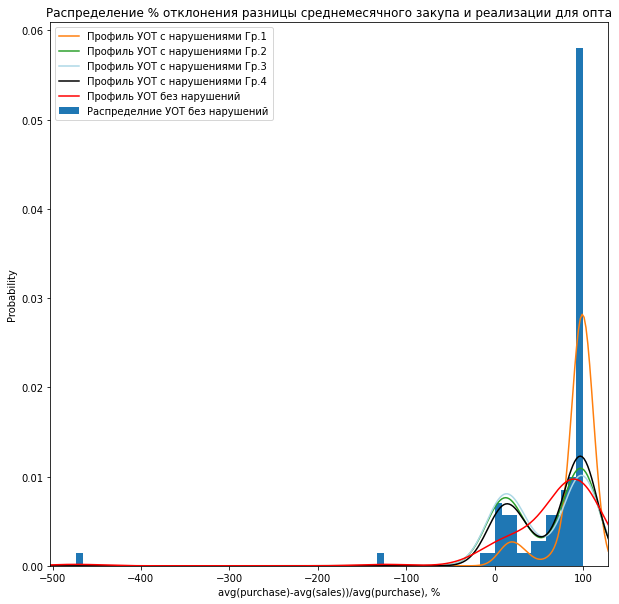

In [ ]:
# Расчет оптовых продаж
# 1.Делаем запрос agg.daily_moves по условию: i_in!='-' and i_out!='-' and i_out!=prid. На выходе имеем ИНН, которые отгружали оптом
# 2.По данным ИНН считаем закуп (daily_moves.cnt) и реализацию (daily_sp_sales.cnt + daily_sp_sales.cnt_attempts).
# в п. 2 По данным ИНН реализация считается по чекам (daily_sp_sales.cnt + daily_sp_sales.cnt_attempts) и оптовая (agg.daily_moves).
# Оптовый ИНН может передавать другому или продавать по чеку 

def QueryWholeSalesV_2(connection_old, DB_str_p1, DB_str_p2, DB_str_p3
                                     , DB_str_p4, DB_str_p5, DB_str_p6 
                                     , flag):
#Оптовые продажи
# Добавить 
   
    if flag == 2: 
            
             select_movies_query = """
             SELECT inn
                   , sum(sales) sales_
                   , sum(purchase) purchase_
                   , floor(avg(sales),1) avg_sales
                   , floor(avg(purchase),1) avg_purchase
                   , floor( (avg(purchase)-avg(sales))/avg(purchase)*100 ,1) perc
                  FROM
                        (SELECT dm.i_out inn 
                        , gt
                        , prid
                        , 0 purchase
                        , sum(dm.c_s) sales
                        , toMonth(dt) Mn
                        FROM agg.daily_moves dm
                        where dt >= toDate('2021-01-01')                                      
                        and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                      --  and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН исходящий заполнен => оптовая реализация
                        group by inn 
                        , Mn
                        , gt
                        , prid
                        having sum(dm.c_s) > 0  
                    UNION ALL
                        SELECT dm_.i_in inn 
                        , gt
                        , prid
                        , sum(dm_.c_s) purchase
                        , 0 sales
                      --  , dt
                        , toMonth(dt) Mn
                        FROM agg.daily_moves dm_
                        where dt >= toDate('2021-01-01')                                      
                        and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                        --  and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm_.emission_type <> 3    -- Не остатки
                            and dm_.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm_.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН входящий заполнен => оптовый закуп
                        group by inn 
                        , Mn
                        , gt
                        , prid
                        having sum(dm_.c_s) > 0                   
                        ) p              
                 left join dict.list_gtins g on p.gt=g.gtin and p.prid = g.inn --and g.pack_type = 'pack'
                 where 
                 g.pg_nk=3
                 and g.pack_type = 'pack'
                 group by inn 
                 order by inn        
             """
             pdf = ph.read_clickhouse(select_movies_query,connection=connection_old)
    
    if flag == 1:
                    #Получаем ИНН,которые имели оптовые продажи
                    
                    select_movies_query = """
                    SELECT dm.i_out inn 
                       -- , gt
                       -- , prid
                       -- , 0 purchase
                       -- , sum(dm.c_s) sales
                        --, dt
                        --, toMonth(dt) 
                        FROM agg.daily_moves dm
                        where dt >= toDate('2020-01-01')                                      
                        and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                        --  and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН исходящий заполнен => оптовая реализация
                        group by inn 
                        --, dt, toMonth(dt)
                        --, gt
                        --, prid
                        having sum(dm.c_s) > 0         
                        """
                    pdf = ph.read_clickhouse(select_movies_query,connection=connection_old)  
    
    if flag == 0:
                    #Получаем ИНН,которые имели оптовые продажи - только для BN
                    print("flag = 1")
                    select_movies_query = """
                    SELECT dm.i_out inn 
                       -- , gt
                       -- , prid
                       -- , 0 purchase
                       -- , sum(dm.c_s) sales
                        --, dt
                        --, toMonth(dt) 
                        FROM agg.daily_moves dm
                        where dt >= toDate('2020-01-01')                                      
                        and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")  or inn IN ("""+str(DB_str_p4)+""") or inn IN ("""+str(DB_str_p5)+""") or inn IN ("""+str(DB_str_p6)+""")
                        --  and inn IN ('504409346457','463212439404','320302005398', '7724490000')      
                            and pt = 0 
                            and dm.emission_type <> 3    -- Не остатки
                            and dm.gt not like '029%'  -- Не остатки
                            and product_group = 3
                            and dm.c_s > 0
                            and i_in!='-' and i_out!='-' and i_out!=prid  -- ИНН исходящий заполнен => оптовая реализация
                        group by inn 
                        --, dt, toMonth(dt)
                        --, gt
                        --, prid
                        having sum(dm.c_s) > 0         
                        """
                    pdf = ph.read_clickhouse(select_movies_query,connection=connection_old)         
    
    
    #continue             
    return pdf


Inn_SNG1_opt = QueryWholeSalesV_2(connection_old, Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3, 
                                  Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3, 1)  
Inn_SNG2_opt = QueryWholeSalesV_2(connection_old, Inn_SNG2_str_p1, Inn_SNG2_str_p2, Inn_SNG2_str_p3, 
                                  Inn_SNG2_str_p1, Inn_SNG2_str_p2, Inn_SNG2_str_p3, 1)  
Inn_SNG3_opt = QueryWholeSalesV_2(connection_old, Inn_SNG3_str_p1, Inn_SNG3_str_p2, Inn_SNG3_str_p3,
                                  Inn_SNG3_str_p1, Inn_SNG3_str_p2, Inn_SNG3_str_p3, 1)  
Inn_SNG4_opt = QueryWholeSalesV_2(connection_old, Inn_SNG4_str_p1, Inn_SNG4_str_p2, Inn_SNG4_str_p3,
                                  Inn_SNG4_str_p1, Inn_SNG4_str_p2, Inn_SNG4_str_p3, 1)  
Inn_BN_opt   = QueryWholeSalesV_2(connection_old, Inn_BN_opt_str_p1, Inn_BN_opt_str_p2, Inn_BN_opt_str_p3,
                                Inn_BN_opt_str_p4, Inn_BN_opt_str_p5, Inn_BN_opt_str_p6, 0)  

"""
Inn_BN_str_p1 = DBF_to_str(DB_BN_p1) # 'ЭТО ИНН без нарушений'
Inn_BN_str_p2 = DBF_to_str(DB_BN_p2) # 'ЭТО ИНН без нарушений'
Inn_BN_str_p3 = DBF_to_str(DB_BN_p3) # 'ЭТО ИНН без нарушений'
Inn_BN_str_p4 = DBF_to_str(DB_BN_p4)
Inn_BN_str_p5 = DBF_to_str(DB_BN_p5)
Inn_BN_str_p6 = DBF_to_str(DB_BN_p6)
"""


# Выделяем ИНН, которые имели продажи в опте:
Inn_SNG1_opt_p1 = np.array(Inn_SNG1_opt.iloc[0:100])
Inn_SNG1_opt_p2 = np.array(Inn_SNG1_opt.iloc[101:200])
Inn_SNG1_opt_p3 = np.array(Inn_SNG1_opt.iloc[201:300])
Inn_SNG1_opt_str_p1 = glDBF_to_str(Inn_SNG1_opt_p1) 
Inn_SNG1_opt_str_p2 = glDBF_to_str(Inn_SNG1_opt_p2) 
Inn_SNG1_opt_str_p3 = glDBF_to_str(Inn_SNG1_opt_p3) 

Inn_SNG2_opt_p1 = np.array(Inn_SNG2_opt.iloc[0:100])
Inn_SNG2_opt_p2 = np.array(Inn_SNG2_opt.iloc[101:200])
Inn_SNG2_opt_p3 = np.array(Inn_SNG2_opt.iloc[201:300])
Inn_SNG2_opt_str_p1 = glDBF_to_str(Inn_SNG2_opt_p1) 
Inn_SNG2_opt_str_p2 = glDBF_to_str(Inn_SNG2_opt_p2) 
Inn_SNG2_opt_str_p3 = glDBF_to_str(Inn_SNG2_opt_p3) 

Inn_SNG3_opt_p1 = np.array(Inn_SNG3_opt.iloc[0:100])
Inn_SNG3_opt_p2 = np.array(Inn_SNG3_opt.iloc[101:200])
Inn_SNG3_opt_p3 = np.array(Inn_SNG3_opt.iloc[201:300])
Inn_SNG3_opt_str_p1 = glDBF_to_str(Inn_SNG3_opt_p1) 
Inn_SNG3_opt_str_p2 = glDBF_to_str(Inn_SNG3_opt_p2) 
Inn_SNG3_opt_str_p3 = glDBF_to_str(Inn_SNG3_opt_p3) 

Inn_SNG4_opt_p1 = np.array(Inn_SNG4_opt.iloc[0:100])
Inn_SNG4_opt_p2 = np.array(Inn_SNG4_opt.iloc[101:200])
Inn_SNG4_opt_p3 = np.array(Inn_SNG4_opt.iloc[201:300])
Inn_SNG4_opt_str_p1 = glDBF_to_str(Inn_SNG4_opt_p1) 
Inn_SNG4_opt_str_p2 = glDBF_to_str(Inn_SNG4_opt_p2) 
Inn_SNG4_opt_str_p3 = glDBF_to_str(Inn_SNG4_opt_p3) 

Inn_BN_opt_p1 = np.array(Inn_BN_opt.iloc[0:100])
Inn_BN_opt_p2 = np.array(Inn_BN_opt.iloc[101:200])
Inn_BN_opt_p3 = np.array(Inn_BN_opt.iloc[201:300])
Inn_BN_opt_str_p1 = glDBF_to_str(Inn_BN_opt_p1) 
Inn_BN_opt_str_p2 = glDBF_to_str(Inn_BN_opt_p2) 
Inn_BN_opt_str_p3 = glDBF_to_str(Inn_BN_opt_p3) 

"""
Tab_BN_opt = QueryRetail(connection_old, Inn_BN_str_p1, Inn_BN_str_p2, Inn_BN_str_p3)
Tab_SNG1_opt = QueryRetail(connection_old, Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3) 
Tab_SNG2_opt = QueryRetail(connection_old, Inn_SNG2_str_p1, Inn_SNG2_str_p2, Inn_SNG2_str_p3) 
Tab_SNG3_opt = QueryRetail(connection_old, Inn_SNG3_str_p1, Inn_SNG3_str_p2, Inn_SNG3_str_p3)
Tab_SNG4_opt = QueryRetail(connection_old, Inn_SNG4_str_p1, Inn_SNG4_str_p2, Inn_SNG4_str_p3)
"""
Tab_BN_opt   = QueryWholeSalesV_2(connection_old, Inn_BN_opt_str_p1, Inn_BN_opt_str_p1, Inn_BN_opt_str_p1, Inn_BN_opt_str_p1, Inn_BN_opt_str_p1, Inn_BN_opt_str_p1, 2)  
Tab_SNG1_opt = QueryWholeSalesV_2(connection_old, Inn_SNG1_opt_str_p1, Inn_SNG1_opt_str_p1, Inn_SNG1_opt_str_p1,Inn_SNG1_opt_str_p1, Inn_SNG1_opt_str_p1, Inn_SNG1_opt_str_p1, 2)  
Tab_SNG2_opt = QueryWholeSalesV_2(connection_old, Inn_SNG2_opt_str_p1, Inn_SNG2_opt_str_p1, Inn_SNG2_opt_str_p1, Inn_SNG2_opt_str_p1, Inn_SNG2_opt_str_p1, Inn_SNG2_opt_str_p1, 2)  
Tab_SNG3_opt = QueryWholeSalesV_2(connection_old, Inn_SNG3_opt_str_p1, Inn_SNG3_opt_str_p1, Inn_SNG3_opt_str_p1,Inn_SNG3_opt_str_p1, Inn_SNG3_opt_str_p1, Inn_SNG3_opt_str_p1, 2)  
Tab_SNG4_opt = QueryWholeSalesV_2(connection_old, Inn_SNG4_opt_str_p1, Inn_SNG4_opt_str_p1, Inn_SNG4_opt_str_p1,Inn_SNG4_opt_str_p1, Inn_SNG4_opt_str_p1, Inn_SNG4_opt_str_p1, 2)  


Tab_BN_opt = Tab_BN_opt.loc[Tab_BN_opt['perc'] != 0]  # Убираем строки с делением на 0
Tab_BN_opt = Tab_BN_opt.loc[Tab_BN_opt['perc'] != 100]  # Убираем строки с отсутствием продаж
Tab_SNG1_opt = Tab_SNG1_opt.loc[Tab_SNG1_opt['perc']  != 0]  # Убираем строки с делением на 0
Tab_SNG2_opt = Tab_SNG2_opt.loc[Tab_SNG2_opt['perc']   != 0]  # Убираем строки с делением на 0
Tab_SNG3_opt = Tab_SNG3_opt.loc[Tab_SNG3_opt['perc']   != 0]  # Убираем строки с делением на 0
Tab_SNG4_opt = Tab_SNG4_opt.loc[Tab_SNG4_opt['perc']   != 0]  # Убираем строки с делением на 0
Tab_BN_opt = Tab_BN_opt.loc[Tab_BN_opt['purchase_']   != 0]  # Убираем строки с делением на 0


TAB_opt = gldfConcat(Tab_BN_opt, Tab_SNG1_opt, Tab_SNG2_opt, Tab_SNG3_opt, Tab_SNG4_opt)

glToExcel("Download_opt.xlsx",TAB_opt)

glGistogram(Tab_BN_opt, Tab_SNG1_opt, Tab_SNG2_opt, Tab_SNG3_opt, Tab_SNG4_opt, TAB_opt, 
            Title = 'Распределение % отклонения разницы среднемесячного закупа и реализации для опта',
            Axes = 'avg(purchase)-avg(sales))/avg(purchase), %')
    


# Фактор 2.1 Превышение максимального срока оборота товаров УОТа. 
## (в работе: из расчета исключается период приостановки деятельности ИП). 



In [ ]:
# Вход:
# Выход:

def QueryTurn(connection, DB_str_p1, DB_str_p2, DB_str_p3):
    # рабочий запрос
    select_movies_query = """          
            SELECT avg_day perc
                , (sender_inn) inn
             FROM agg.agg_codes_turnover ct
             left join dict.list_gtins g on ct.gtin=g.gtin
              where 1=1
               and inn IN ("""+str(DB_str_p1)+""") or inn IN ("""+str(DB_str_p2)+""") or inn IN ("""+str(DB_str_p3)+""")
                  and ct.oper_date >= toDate('2021-01-01')
                 and ct.prid = g.inn
                 -- and ct.product_group = 3  -- вопрос
                 and ct.emission_type <> 3    -- Не остатки
                 and ct.gtin not like '029%'  -- Не остатки
                 and g.pg_nk=3
                 and g.pack_type = 'pack'
               group by inn
               , perc
               """

    pdf_turn = ph.read_clickhouse(select_movies_query,connection=connection)
    return pdf_turn


def ToExcelTurn(path,DB):
    df = pd.DataFrame(DB)
    #df
    df.to_excel(path)
    #to_excel('D:\AI\DB\Download_2.xlsx')
    
def dfConcatTurn():
    #Вход: группы УОТ
    #Выход: TAB с конкатенцией
    Tab_SNG1['Y'] = 1
    Tab_SNG2['Y'] = 1
    Tab_SNG3['Y'] = 1
    Tab_SNG4['Y'] = 1
    Tab_BN['Y'] = 0
   
    TAB_ = pd.concat([Tab_SNG1, Tab_SNG2, Tab_SNG3, Tab_SNG4, Tab_BN],ignore_index=True)
    return TAB_


Tab_BN = QueryTurn(connection, Inn_BN_str_p1, Inn_BN_str_p2, Inn_BN_str_p3)
Tab_SNG1 = QueryTurn(connection, Inn_SNG1_str_p1, Inn_SNG1_str_p2, Inn_SNG1_str_p3) #+
Tab_SNG2 = QueryTurn(connection, Inn_SNG2_str_p1, Inn_SNG2_str_p2, Inn_SNG2_str_p3) #+
Tab_SNG3 = QueryTurn(connection, Inn_SNG3_str_p1, Inn_SNG3_str_p2, Inn_SNG3_str_p3)
Tab_SNG4 = QueryTurn(connection, Inn_SNG4_str_p1, Inn_SNG4_str_p2, Inn_SNG4_str_p3)
#Tab_SNG4 = Tab_SNG4.loc[Tab_SNG4['perc'] > 0]  # Убираем строки с делением на 0

Tab_BN = Tab_BN.loc[Tab_BN['perc'] != 0]  # Убираем строки с делением на 0
Tab_BN = Tab_BN.loc[Tab_BN['perc'] != 100]  # Убираем строки с отсутствием продаж
Tab_SNG1 = Tab_SNG1.loc[Tab_SNG1['perc']   != 0]  # Убираем строки с делением на 0
Tab_SNG2 = Tab_SNG2.loc[Tab_SNG2['perc']   != 0]  # Убираем строки с делением на 0
Tab_SNG3 = Tab_SNG3.loc[Tab_SNG3['perc']   != 0]  # Убираем строки с делением на 0
Tab_SNG4 = Tab_SNG4.loc[Tab_SNG4['perc']   != 0]  # Убираем строки с делением на 0

TAB = dfConcatTurn() 

In [ ]:
pip install -U numpy

In [ ]:
!pip list -o

In [ ]:
pip install seaborn

In [ ]:
pip install pandas

## Настройка доступов off-line аналитики

In [ ]:
!whoami

In [ ]:
import sys
import os
os.environ["HADOOP_HOME"] = "/opt/hadoop-default-3.1.3"
#os.environ["HIVE_HOME"]= "/opt/hive-default-3.1.2"
os.environ["SPARK_HOME"] = "/opt/spark-default-current"
sys.path.append("/opt/spark-default-current/python")
sys.path.append("/opt/spark-default-current/python/lib/py4j-0.10.7-src.zip")

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import *

spark = SparkSession.builder\
.appName("SUR")\
.master("yarn")\
.config("spark.executor.cores", "4")\
.config("spark.executor.memory", "16g")\
.config("spark.executor.memoryOverhead", "2g")\
.config("spark.dynamicAllocation.enabled", "true")\
.config("spark.dynamicAllocation.minExecutors", "1")\
.config("spark.dynamicAllocation.maxExecutors", "10")\
.config("spark.dynamicAllocation.executorIdleTimeout", "600s")\
.config("spark.external.shuffle.service", "true")\
.config("spark.jars", "hdfs://analytics-offline/spark/jars/hudi-spark-bundle_2.11-0.6.0.jar")\
.config("spark.executor.extraClassPath", "hdfs://analytics-offline/spark/jars/hudi-spark-bundle_2.11-0.6.0.jar")\
.config("spark.driver.extraClassPath", "hdfs://analytics-offline/spark/jars/hudi-spark-bundle_2.11-0.6.0.jar")\
.getOrCreate()

import pandas as pd
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 1000)

In [ ]:
spark.read\
.format("org.apache.hudi")\
.load("/data/tobacco/silver/cis_history")\
.createOrReplaceTempView("tob_silver_cis_history_view")

## Нарушение №1. Наличие у УОТа КМ, предназначенных для продукции, ввозимой на территорию Российской Федерации, в статусе «Эмитирован.Получен» более установленного срока с даты эмиссии. 

In [ ]:
spark.sql("""
select distinct g.inn from
(select
c
,inn
, floor(out_date - in_date) days
from (
select
c
, out.o inn
, out.opd out_date
, 0 in_date
from tob_silver.cis_history out
where out.opday >= '2021-10-25'
and out.pg = 3
and out.gt not like '029%' -- не остатки
and out.t = 1  -- в обороте
and out.c in ('02900009741493!YTtqN.', '000000462128184WVN86q', '04606203101061OkWFYAI')
group by inn, out_date, in_date, c
UNION ALL
select
c
, in.o inn
, 0 out_date
, in.opd in_date
from tob_silver.cis_history in
where in.opday >= '2021-10-25'
and in.pg = 3
and in.gt not like '029%' -- не остатки
and in.t = 0 -- нанесен
and in.c in ('02900009741493!YTtqN.', '000000462128184WVN86q', '04606203101061OkWFYAI')
group by inn, out_date, in_date, c
) p
group by c, inn, floor(out_date - in_date)
) g
""").toPandas()

In [ ]:
df = spark.table("tob_silver.cis_history").limit(5).toPandas()
df

In [ ]:
# year_apple (год производства товара) : 2019: много
# 2020: всего 2
# Отбор по ИНН нарушителей
# cis history

# Чтобы посмотреть дату эмиссии (Emission_Date) КМ ye;yj нужно соединять с таблицей AGG_CIS

In [ ]:
spark.sql("refresh table tob_silver.cis_history")

In [ ]:
#на выходе count (c), строим распределение
# опеделяем, наример, что более 5 звеньев - это отклонение
# Огнаничиваем select этими ИНН
## InnerJoin по длинным цепочкам и те ИНН, которые в этих цепочках присутствуют
# расчет ИНН, которые были в этих цепочках

#https://zeppelin-offline.prod.analytics.crpt.tech/#/notebook/2GJRA8M1K

spark.sql("""
select gt,c, count(sinn)  
from tob_silver.cis_history
where opday > '2021-10-01'
group by gt,c
""").toPandas()

## Фактор 5. Наличие длинных ТПЦ по статистике среднего количества звеньев в отрасли: количество звеньев в обороте товара 

             count_KM  cumpercentage
cnt_nodes                           
1           476135476      11.510943
2           651373685      27.258405
3           924479721      49.608417
4          1590154229      88.051624
5           464334910      99.277280
6            26909304      99.927833
7             2713769      99.993440
8              250891      99.999506
9               17861      99.999938
10               2576     100.000000


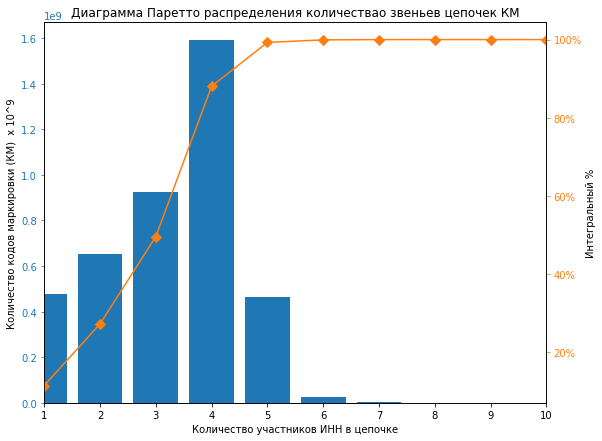

80% КМ имеют количество участников в цепочке менее 4 ИНН


In [ ]:
def Paretto_CISHISTORY(): 
#Cкрипт для расчета Парето от 28.10.21

    spark.sql("""
    select paret.cnt_nodes, count(paret.c)  
    from (
    select c
    , count(distinct hist.sinn) cnt_nodes
    from (
        select h.c, h.t, h.sinn, sum(case when st in ('4') then 1 end) over (partition by c) sum_out  -- st = 4
        from tob_silver.cis_history h 
        where h.opday >= '2021-01-01'
        ) hist
    where hist.sum_out > 0
    group by hist.c
    ) paret
    group by paret.cnt_nodes
    """).toPandas()


def Paretto():
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.ticker import PercentFormatter
    path = 'Paretto_161121.xls'
    sheet_name = 'DataSet'
    DBi = pd.read_excel(path, sheet_name = sheet_name) 
  
    df = pd.DataFrame({'count_KM': DBi.count_c.iloc[0:10]})  
    df.index = DBi.cnt_nodes.iloc[0:10] 
    
    df["cumpercentage"] = df["count_KM"].cumsum()/df["count_KM"].sum()*100
    print(df)
    DDF = pd.DataFrame(df)
  
    
    fig, ax = plt.subplots()
    ax.bar(df.index, df["count_KM"], color="C0")
    ax.set_xlabel('Количество участников ИНН в цепочке')
    ax.set_ylabel('Количество кодов маркировки (КМ)  x 10^9')
    
    mn, mx = plt.xlim()  # настройка осей
    plt.xlim(1, 10)
    kde_xs = np.linspace(mn, mx, 10)
   
    ax2 = ax.twinx()
    ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel('Интегральный %')

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    
    Title = "Диаграмма Паретто распределения количествао звеньев цепочек КМ"
    plt.title(Title);
    fig.set_size_inches(9, 7)
    plt.show()
    print("80% КМ имеют количество участников в цепочке менее 4 ИНН")
    
Paretto() 

